# Introduction

## Supervised Learning

Supervised learning is where you have input variables (X) and an output variable (y) and you use an algorithm to learn the mapping function from the input to the output.

                                                    y = f(X)
                                                    
### Regression : 
A supervised learning problem where we try to map input variable (X) to continuous output (y). For example : Trying to predict the house price on the basis of number of rooms, built area etc.

### Classification :
A supervised learning problem where we try to map input variable (X) to discrete output (y). For example : Marking mails or SMSs as spam/not-spam on the basis of its content, origin etc. 

## Unsupervised Learning

Unsupervised learning is where you only have input data (X) and no corresponding output variables. The goal for unsupervised learning is to model the underlying structure or distribution in the data in order to learn more about the data.

# Linear Regression

<img src="media/img1.png" alt="Regression" style="width : 500px;"/>

We will mainly cover three topics : 
1. Hypothesis Function - Defining our function f(x)
2. Cost Function - Checking the performance of out model/function.
3. Optimization (Gradient Descent) - Improving the performance of our model/function

## Hypothesis Function

The hypothesis function for univariate linear regression problem is :
$$\widehat{y} = w_{0} + w_{1}x$$

$\widehat{y}$ = Output predicted by our model.

$w_{0} , w_{1}$ = Parameters of our model, also known as weights.

$x$ = The input feature



The hypothesis function for multivariate linear regression problem is :

$$\widehat{y} = w_{0} + w_{1}x_{1} + w_{2}x_{2} + .... + w_{m}x_{m}$$

$\widehat{y}$ = Output predicted by our model.

$w_{0} , w_{1} , w_{2} , ... , w_{m}$ = Parameters of our model, also known as weights (W).

$x_{1} , x_{2} , ... , x_{m}$ = Values of our input feature vector (X).

$m$ = Number of features


Any set of $W = [w_{0} , w_{1} , w_{2} , ... , w_{m}]$ uniquely identifies a model.

For example, in a univariate problem, for a particular value of $w_{0}, w_{1}$, we can have this plot : 

<img src="media/img4.png" alt="Regression" style="width : 500px;"/>


## Cost Function

It is used to check how good or bad our current model is performing.

Cost function of our model/function parameterized by $W$,
$$ J(W) = \frac{1}{n} \sum_{i=1}^{n} (\widehat{y_{i}} - y_{i})^{2}$$

$W = [w_{0},w_{1},w_{2},...w_{m}]$

$\widehat{y_{i}}$ = Output predicted by our model for $i^{th}$ input

$y_{i}$ = Actual output for $i^{th}$ input

$n$ = Number of data points

#### So our ultimate objective is to minimize the cost.

## Optimization (Gradient Descent)

If our model is not performing good we need to train it. Training a model means changing/tuning the value of W (weight/parameters of our model), so that the cost decreases. 

Let us assusme that,
$$\widehat{y} = w_{1}x_{1}$$

Hence our cost function becomes : 
$$ J(w_{1}) = \frac{1}{n} \sum_{i=1}^{n} (w_{1}(x_{1}^{(i)}) - y_{i})^{2}$$

Plotting $J(w_{1})$ against $w_{1}$:

<img src="media/img5.png" alt="Regression" style="width : 500px;"/>

In two dimension, the plot would look something like this:

<img src="media/img6.jpg" alt="Regression" style="width : 500px;"/>

It would look scary in higher dimensions, so lets leave that for now!


Lets not forget that our ultimate goal is to minimize the cost $J(W)$. To minimize $J(W)$ we'll perform gradient decent steps iteratively. 

One step of gradient descent is : 

For all weights $w_{j}$ :

$$w_{j} = w_{j} - \alpha \frac{\partial}{\partial w_{j}} J(W)$$

$\alpha$ = Learning rate

$\frac{\partial}{\partial w_{j}} J(W)$ = Partial derivative of cost function $J(W)$ w.r.t. $w_{i}$

$$\frac{\partial}{\partial w_{j}} J(W) = \frac{2}{n} \sum_{i=1}^{n}(\widehat{y_{i}} - y_{i})x_{j}^{(i)}$$

This gradient descent step is done repetitively untill the learning is stopped.

<img src="media/img7.png" alt="Regression" style="width : 500px; height : 400px;"/>

<img src="media/img8.gif" alt="Regression" style="width : 500px;"/>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

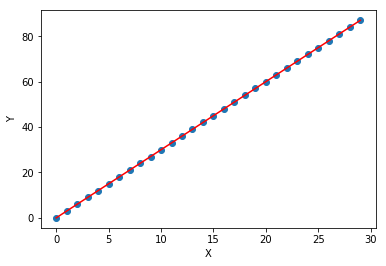

In [39]:
X = np.arange(30)
y = 3 * X
plt.scatter(X,y)
plt.plot(X,y_pred,color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [5]:
model = LinearRegression()
model.fit(X.reshape((-1,1)),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
model.coef_

array([3.])

In [38]:
y_pred = model.predict(X.reshape(-1,1))
mse = mean_squared_error(y_pred, y)
print(mse)

8.133155932828631e-29


<h1>HOUSE DATA MODEL<h1>

In [41]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [42]:
cols_to_be_used = data[['sqft_living']]
X = np.array(cols_to_be_used)
y = np.array(data['price'])
print(X.shape)
print(y.shape)

(21613, 1)
(21613,)


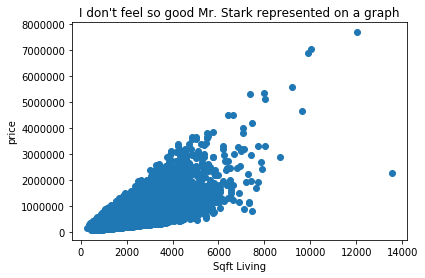

In [48]:
plt.scatter(X,y)
plt.title("I don't feel so good Mr. Stark represented on a graph")
plt.xlabel("Sqft Living")
plt.ylabel("price")
plt.show()

In [50]:
peter_parker = LinearRegression()
peter_parker.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

68351286833.039825


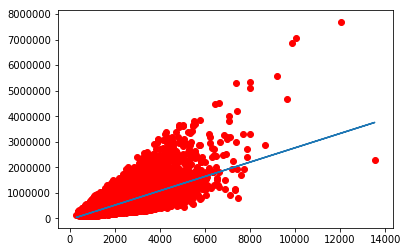

In [57]:
why_pred = peter_parker.predict(X)
sed_lyf = mean_squared_error(why_pred, y)
plt.plot(X, why_pred)
plt.scatter(X, y, color = 'red')
plt.show
print(sed_lyf)

62980654272.72017


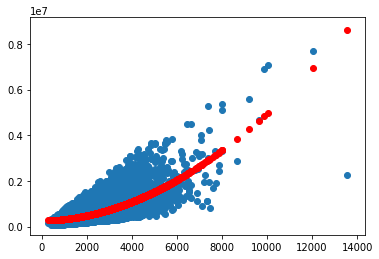

In [76]:
peter_parker.fit(X**1.9,y)
why_not_pred = peter_parker.predict(X**1.9)
happy_lyf = mean_squared_error(why_not_pred, y)
plt.scatter(X, y)
plt.scatter(X, why_not_pred, color='red')
plt.show
print(happy_lyf)